# Q1.Delivery_time -> Predict delivery time using sorting time 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
data=pd.read_csv('C:\\Users\\ujwala\\Desktop\\ujwala Ds assignment\\Ds Datasets\\delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 372.0 bytes


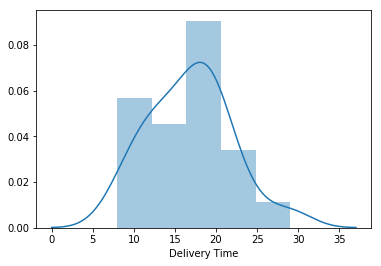

In [6]:
sns.distplot(data['Delivery Time'])

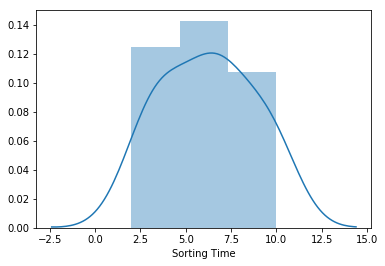

In [7]:
sns.distplot(data['Sorting Time'])

# Renaming column

In [8]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [9]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


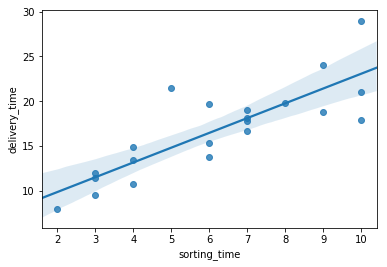

In [9]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

# Model Building

In [10]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

# Model Testing

In [11]:
model.params                                         # Finding Coefficient parameters

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [12]:
model.tvalues , model.pvalues                       # Finding tvalues and pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [13]:
model.rsquared , model.rsquared_adj                  # Finding Rsquared Values

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [15]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [16]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [18]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Q2 .Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [19]:
data=pd.read_csv('C:\\Users\\ujwala\\Desktop\\ujwala Ds assignment\\Ds Datasets\\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 516.0 bytes


In [20]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [22]:
data[data.duplicated()].shape

(0, 2)

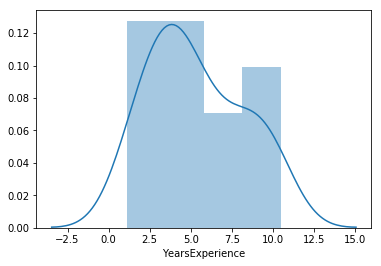

In [22]:
sns.distplot(data['YearsExperience'])

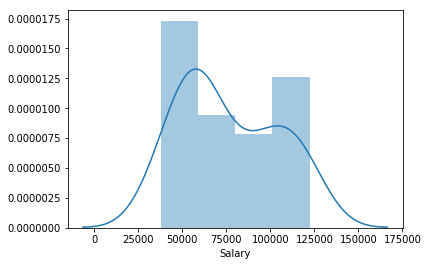

In [23]:
sns.distplot(data['Salary'])

# Plotting the data to check for outliers

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

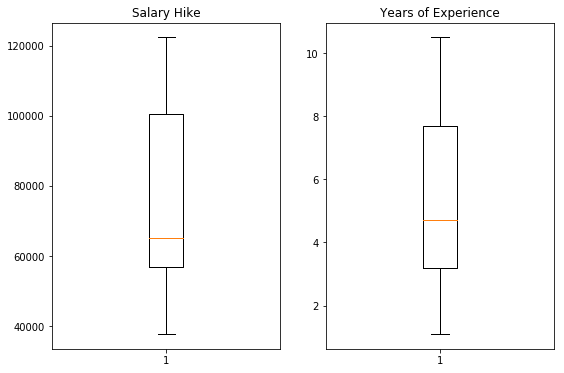

In [25]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')
plt.show()

# Correlation Analysis

In [24]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


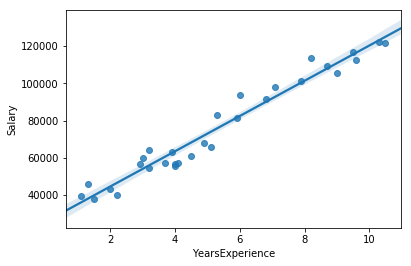

In [25]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

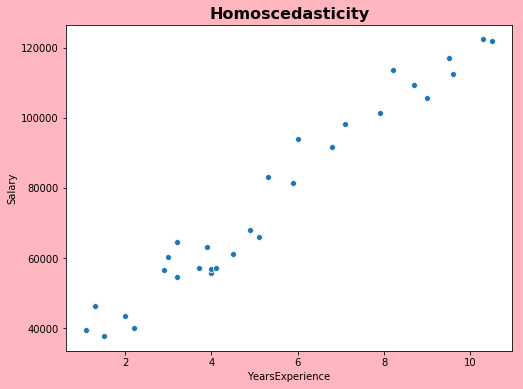

In [63]:
plt.figure(figsize = (8,6), facecolor = 'lightpink')
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [28]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

# Different transformation of data to estimate normal distribution and remove any skewness

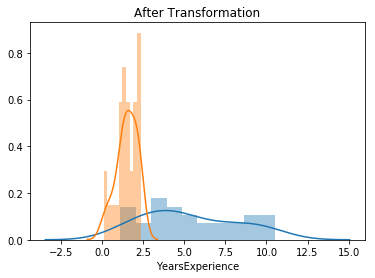

In [31]:
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

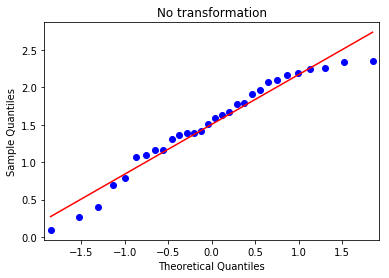

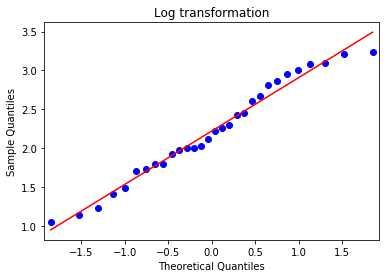

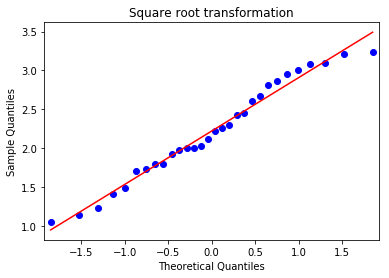

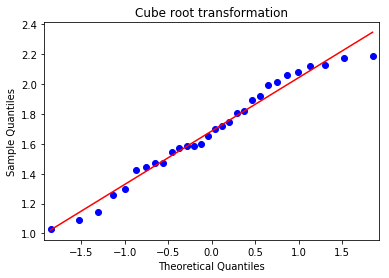

In [32]:
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

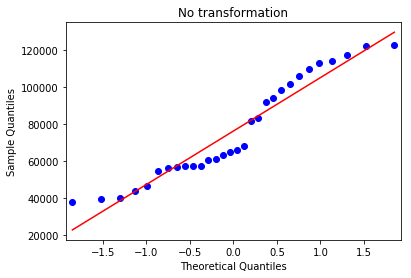

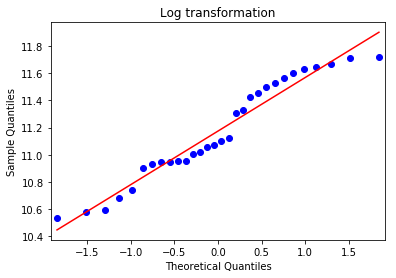

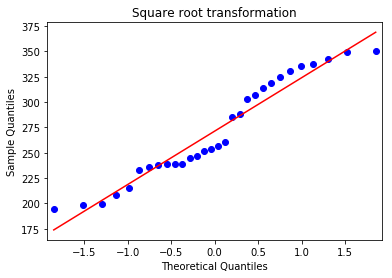

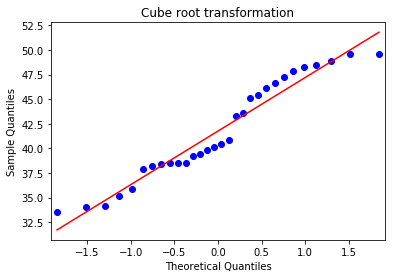

In [36]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [ ]:
# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression

In [ ]:
import statsmodels.formula.api as sm

# Model Building

In [26]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        23:15:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root transformation on data

In [39]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           7.58e-19
Time:                        23:16:33   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cuberoot transformation on Data

In [41]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           6.37e-18
Time:                        23:18:00   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [42]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                        23:18:37   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [27]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [28]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [29]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Test for Normality of Residuals (Q-Q Plot)

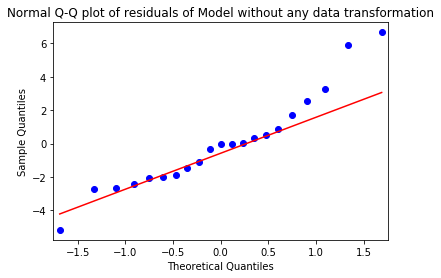

In [43]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

# Residual Plot to check Homoscedasticity or Hetroscedasticity

In [46]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

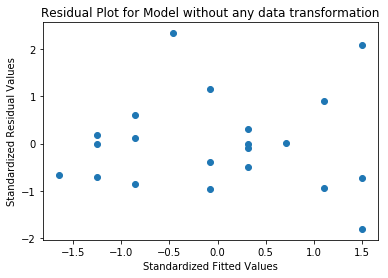

In [45]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# Model Validation

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
model1_pred_y =np.square(model1.predict(data['YearsExperience']))
model2_pred_y =pow(model2.predict(data['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(data['YearsExperience']))

In [49]:
model1_rmse =np.sqrt(mean_squared_error(data['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

('model=', 2.9349037688901394, '\nmodel1=', 5960.647096174313, '\nmodel2=', 6232.815455835853, '\nmodel3=', 7219.716974372787)


In [50]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values

# Model Predictions

In [54]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [60]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [61]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5
